In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.cosmology import FlatLambdaCDM
import astropy.units as u

In [2]:
plt.style.use("dstyle")
_ = plt.figure()
plt.style.use("dstyle")

<Figure size 432x288 with 0 Axes>

In [3]:
def omegaR(omegaM, z_eq):
    return omegaM / (1 + z_eq)

# https://arxiv.org/pdf/2404.03002 - table 3 
omegaM_Pantheon = 0.3085
omegaM_Union3 = 0.3230
omegaM_DESY5 = 0.3160

# https://arxiv.org/pdf/1807.06209 - table 2
omegaM_Planck = 0.3111
zeq_Planck = 3387

print(f"OmegaR for Planck is: {omegaR(omegaM_Planck, zeq_Planck):.10f} ")
print(f"OmegaR for Pantheon is: {omegaR(omegaM_Pantheon, zeq_Planck):.10f} ")
print(f"OmegaR for Union3 is: {omegaR(omegaM_Union3, zeq_Planck):.10f} ")
print(f"OmegaR for DESY5 is: {omegaR(omegaM_DESY5, zeq_Planck):.10f} ")

OmegaR for Planck is: 0.0000918241 
OmegaR for Pantheon is: 0.0000910567 
OmegaR for Union3 is: 0.0000953365 
OmegaR for DESY5 is: 0.0000932704 


In [4]:
table_fname_Planck2018 = "table_Planck2018.txt"
table_fname_Pantheon = "table_Pantheon.txt"
table_fname_Union3 = "table_Union3.txt"
table_fname_DESY5 = "table_DESY5.txt"

table_Planck2018 = np.loadtxt(table_fname_Planck2018, skiprows=1, delimiter = ',')
table_Pantheon = np.loadtxt(table_fname_Pantheon, skiprows=1, delimiter = ',')
table_Union3 = np.loadtxt(table_fname_Union3, skiprows=1, delimiter = ',')
table_DESY5 = np.loadtxt(table_fname_DESY5, skiprows=1, delimiter = ',')

In [5]:
z_arr = table_Planck2018[:,0]
l_z_arr = table_Planck2018[:,1]
a_arr = table_Planck2018[:,2]


time_look_Planck2018 = table_Planck2018[:,3]
dist_comov_Planck2018 = table_Planck2018[:,7]
dist_angdiam_Planck2018 = table_Planck2018[:,9]
dist_mod_Planck2018 = table_Planck2018[:,10]


time_look_Pantheon = table_Pantheon[:,3]
dist_comov_Pantheon = table_Pantheon[:,7]
dist_angdiam_Pantheon = table_Pantheon[:,9]
dist_mod_Pantheon = table_Pantheon[:,10]


time_look_Union3 = table_Union3[:,3]
dist_comov_Union3 = table_Union3[:,7]
dist_angdiam_Union3 = table_Union3[:,9]
dist_mod_Union3 = table_Union3[:,10]


time_look_DESY5 = table_DESY5[:,3]
dist_comov_DESY5 = table_DESY5[:,7]
dist_angdiam_DESY5 = table_DESY5[:,9]
dist_mod_DESY5 = table_DESY5[:,10]

In [6]:
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

dist_comov_astropy = np.zeros_like(z_arr)
dist_mod_astropy = np.zeros_like(z_arr)
dist_angdiam_astropy = np.zeros_like(z_arr)

time_look_astropy = np.zeros_like(z_arr)

a_arr_astropy = np.zeros_like(z_arr)

for i, z in enumerate(z_arr):
    
    dist_comov_astropy[i] = cosmo.comoving_distance(z).value
    dist_angdiam_astropy[i] = cosmo.angular_diameter_distance(z).value
    dist_mod_astropy[i] = cosmo.distmod(z).value
    
    time_look_astropy[i] = (cosmo.lookback_time(z_arr[i]) * cosmo.H0).cgs
    
    a_arr_astropy[i] = cosmo.scale_factor(z_arr[i])

print(cosmo)

FlatLambdaCDM(H0=70.0 km / (Mpc s), Om0=0.3, Tcmb0=0.0 K, Neff=3.04, m_nu=None, Ob0=None)


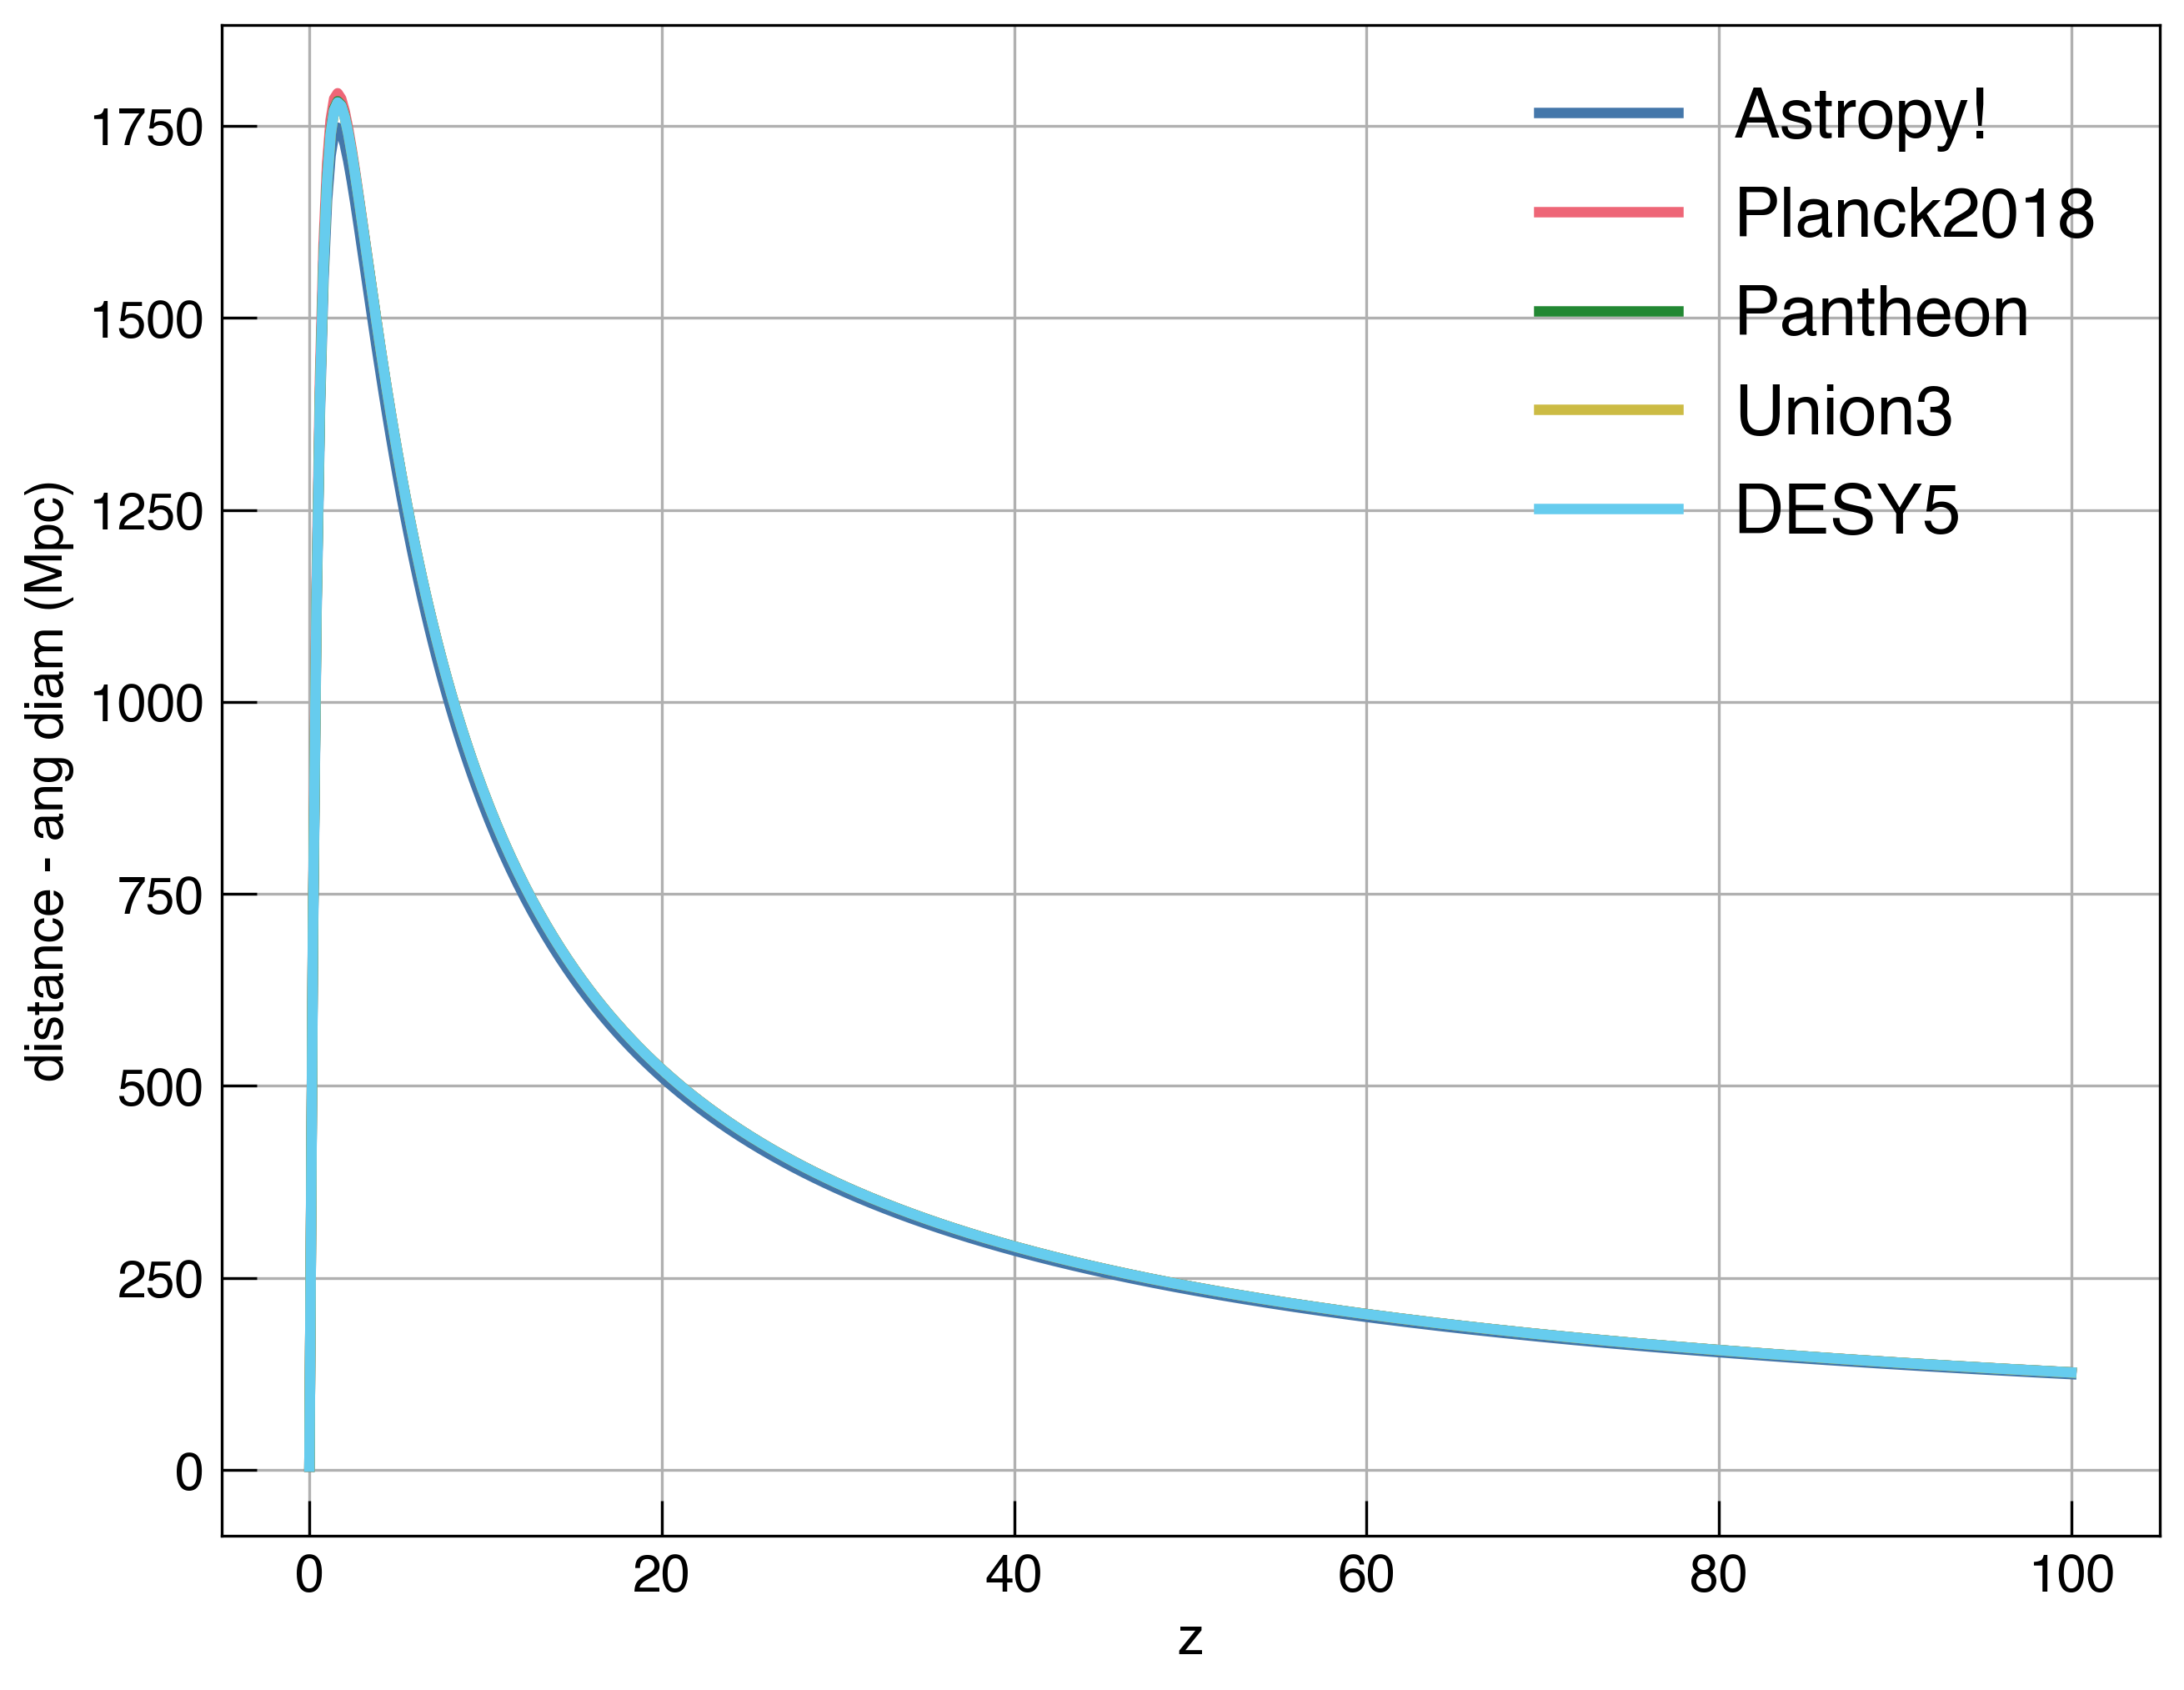

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, dist_angdiam_astropy, label='Astropy!')
ax.plot(z_arr, dist_angdiam_Planck2018, label='Planck2018')
ax.plot(z_arr, dist_angdiam_Pantheon, label='Pantheon')
ax.plot(z_arr, dist_angdiam_Union3, label='Union3')
ax.plot(z_arr, dist_angdiam_DESY5, label='DESY5')

ax.set_xlabel("z")
ax.set_ylabel("distance - ang diam (Mpc)")

ax.grid()

plt.legend()

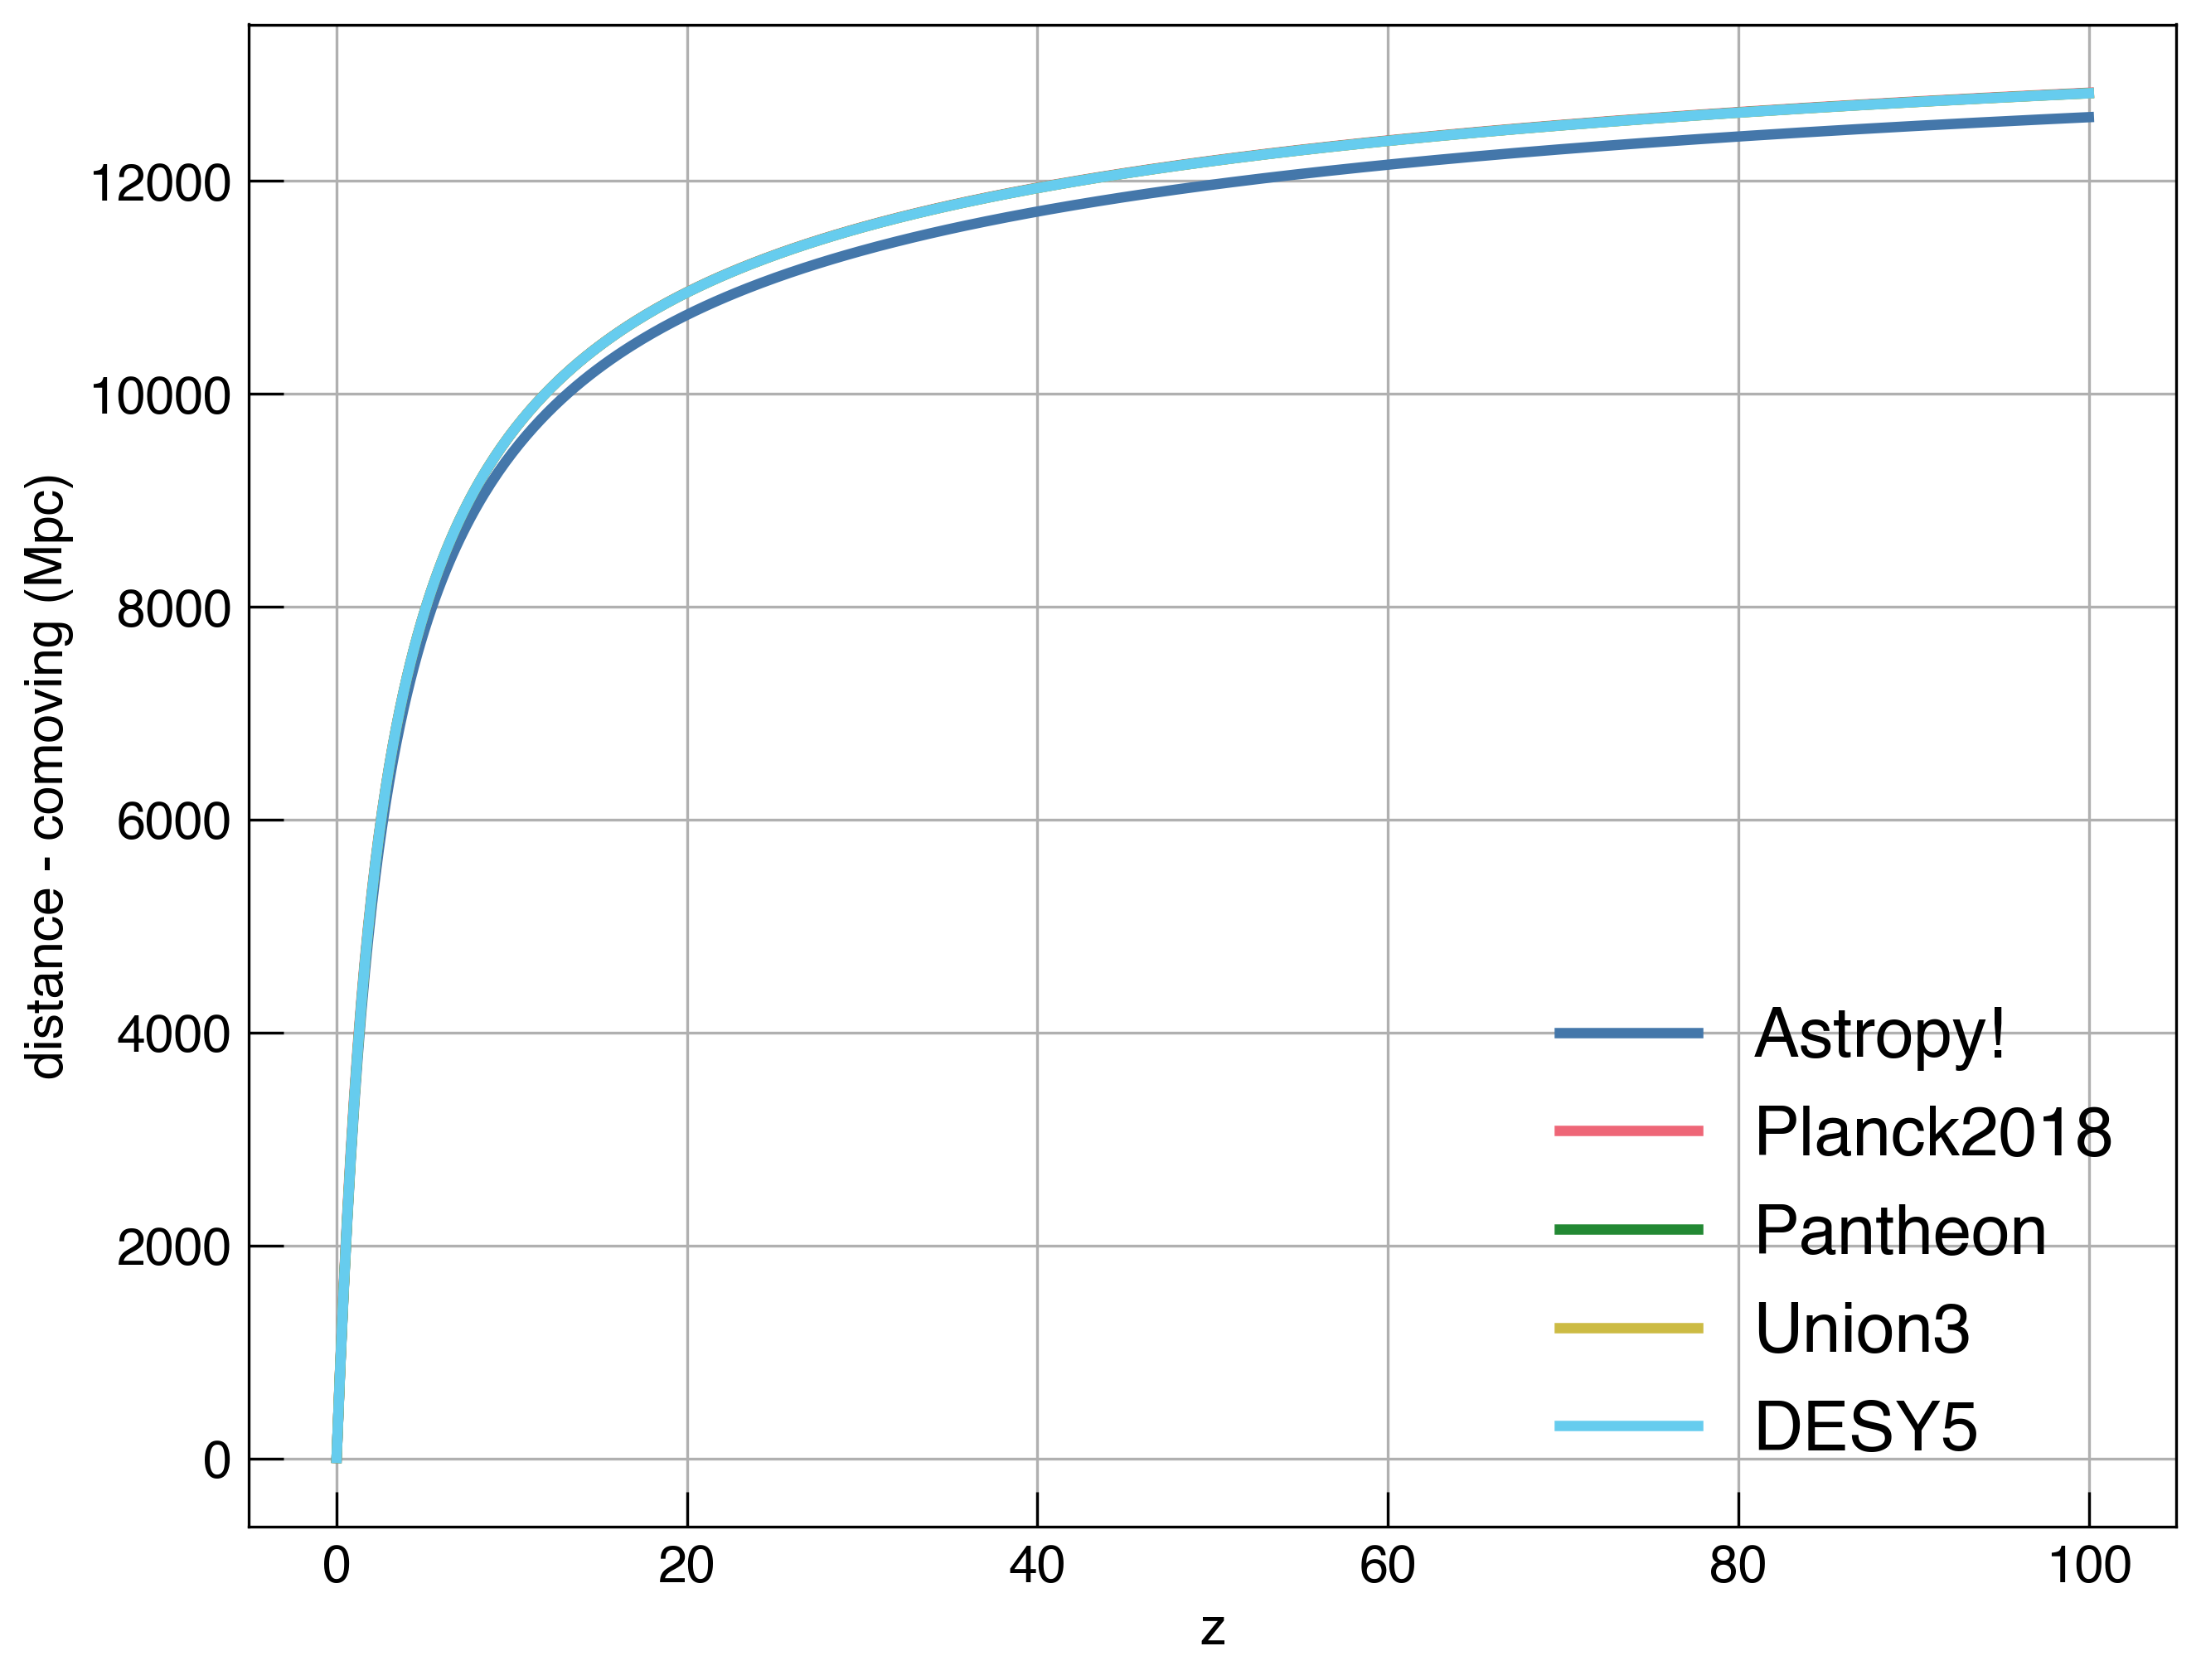

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, dist_comov_astropy, label='Astropy!')
ax.plot(z_arr, dist_comov_Planck2018, label='Planck2018')
ax.plot(z_arr, dist_comov_Pantheon, label='Pantheon')
ax.plot(z_arr, dist_comov_Union3, label='Union3')
ax.plot(z_arr, dist_comov_DESY5, label='DESY5')


ax.set_xlabel("z")
ax.set_ylabel("distance - comoving (Mpc)")

ax.grid()

plt.legend()

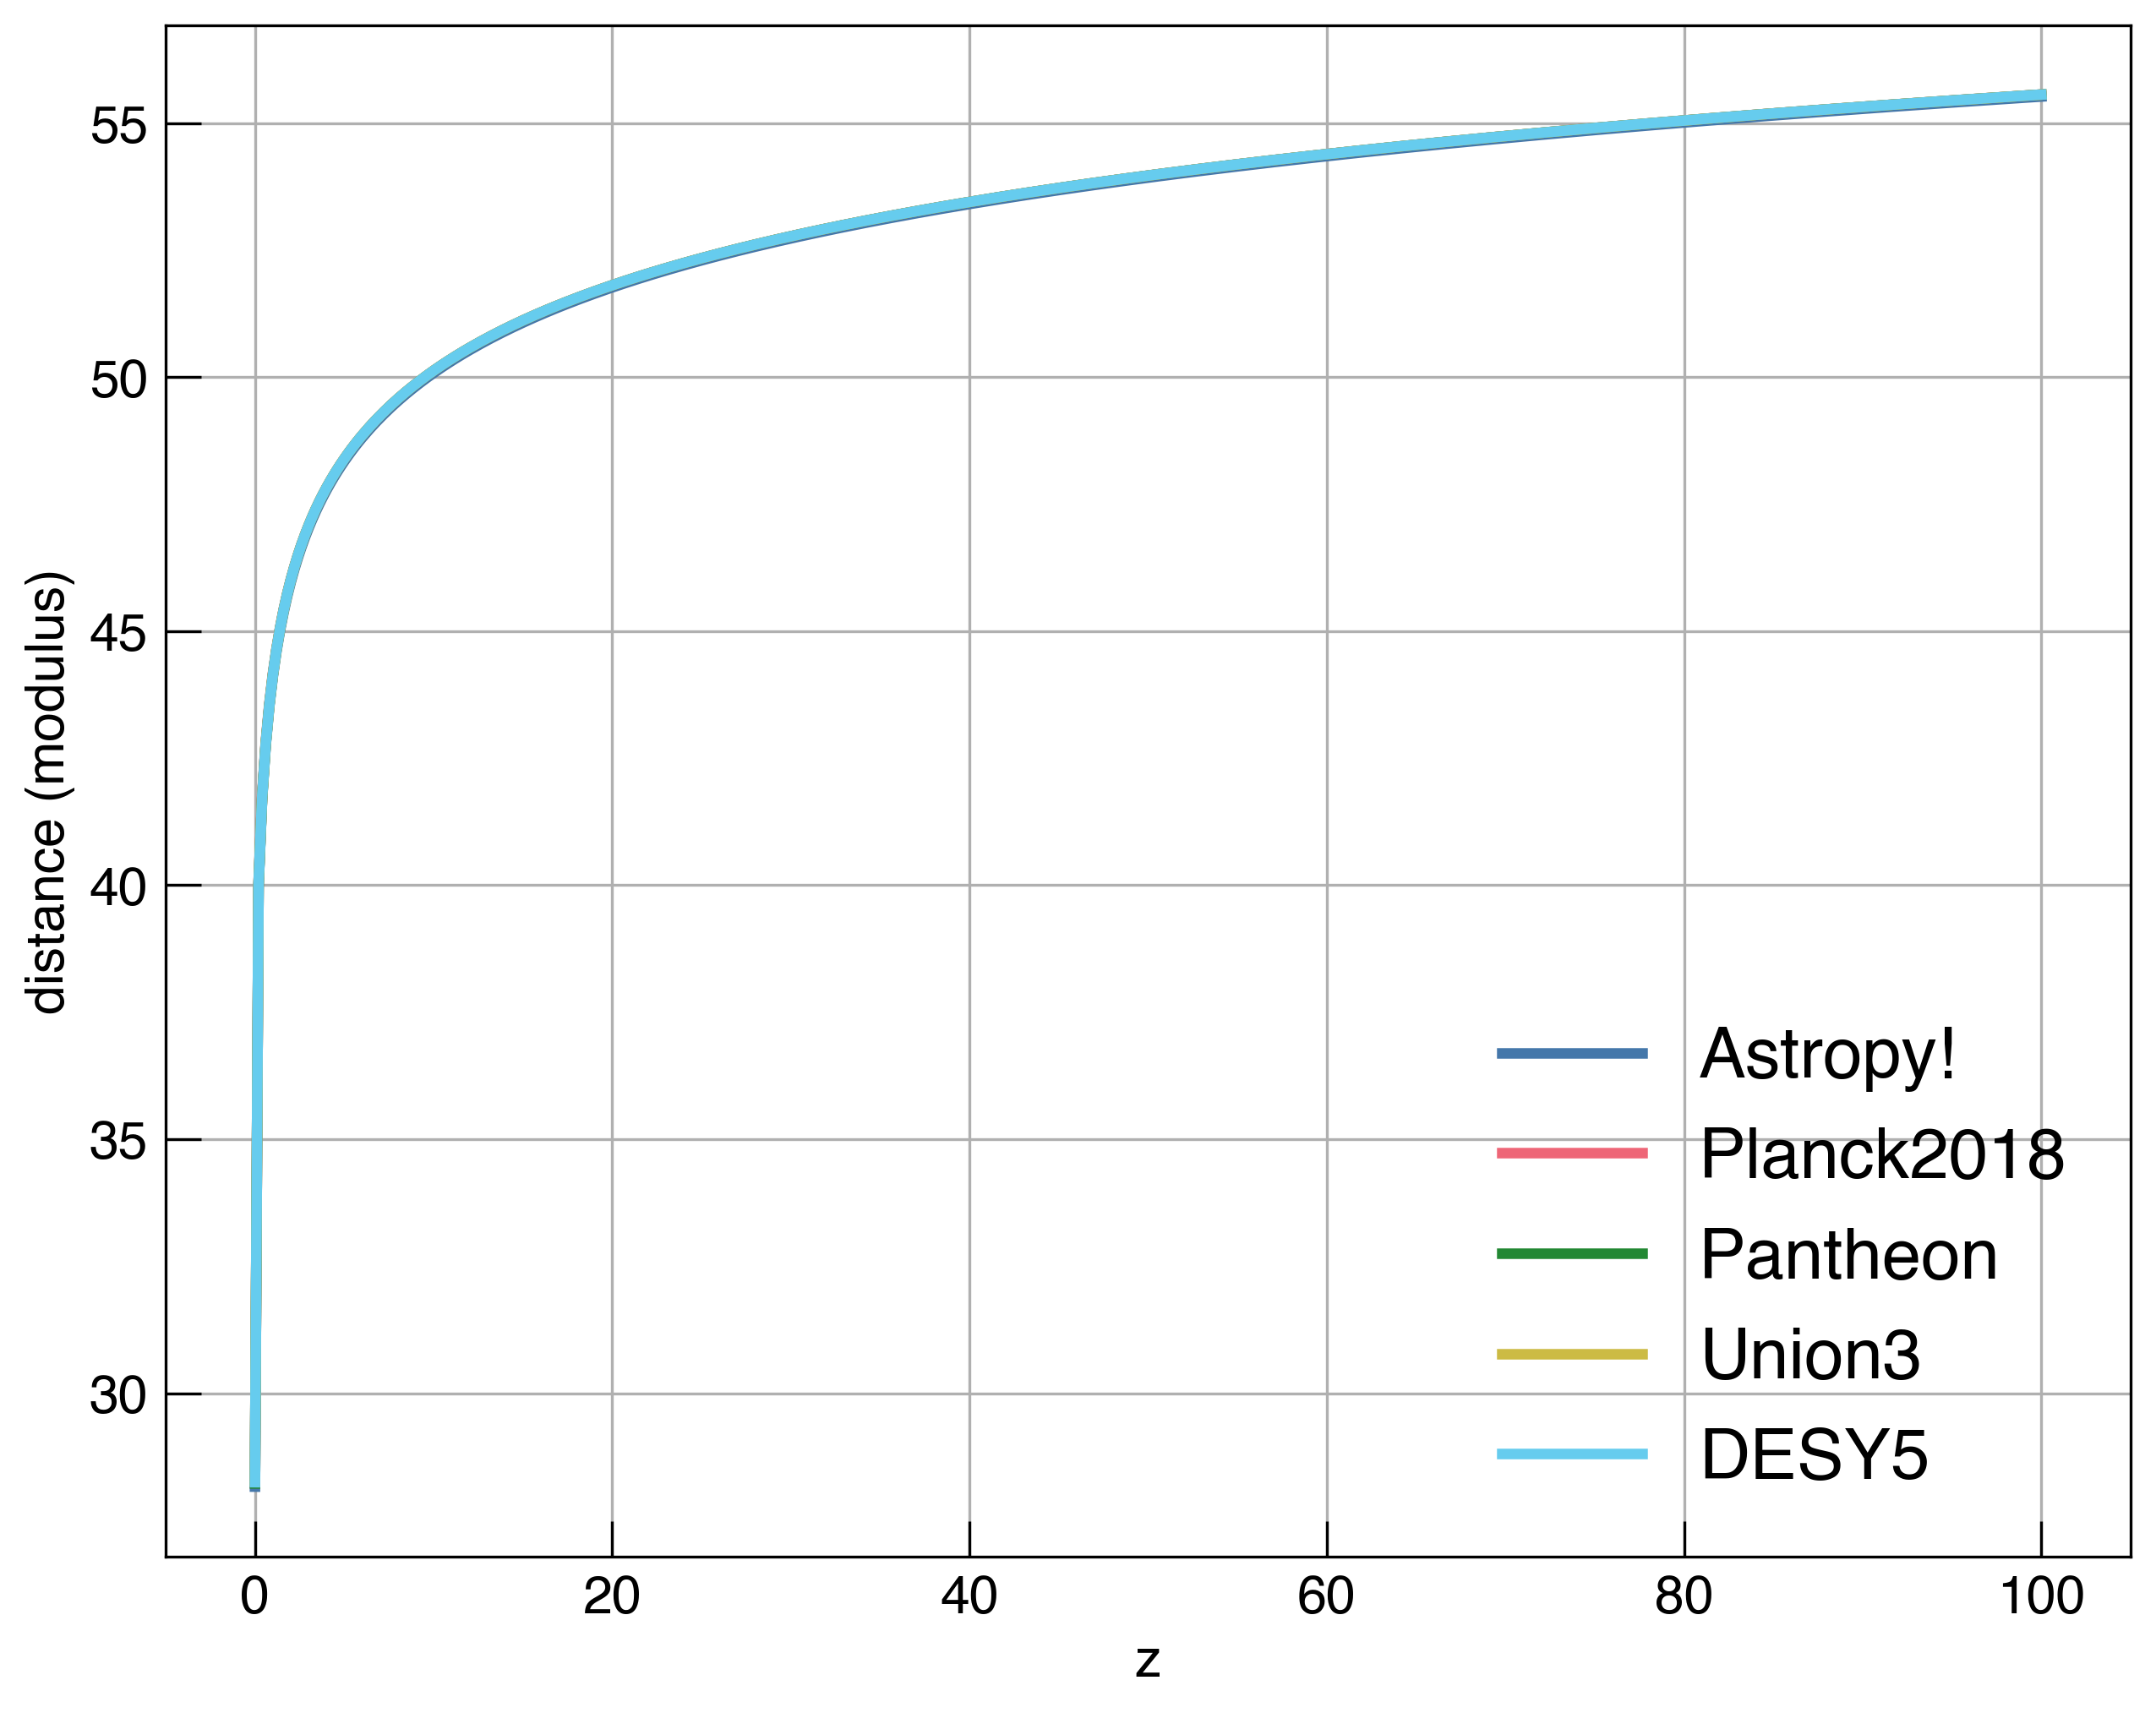

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, dist_mod_astropy, label='Astropy!')
ax.plot(z_arr, dist_mod_Planck2018, label='Planck2018')
ax.plot(z_arr, dist_mod_Pantheon, label='Pantheon')
ax.plot(z_arr, dist_mod_Union3, label='Union3')
ax.plot(z_arr, dist_mod_DESY5, label='DESY5')

ax.set_xlabel("z")
ax.set_ylabel("distance (modulus)")

ax.grid()

plt.legend()

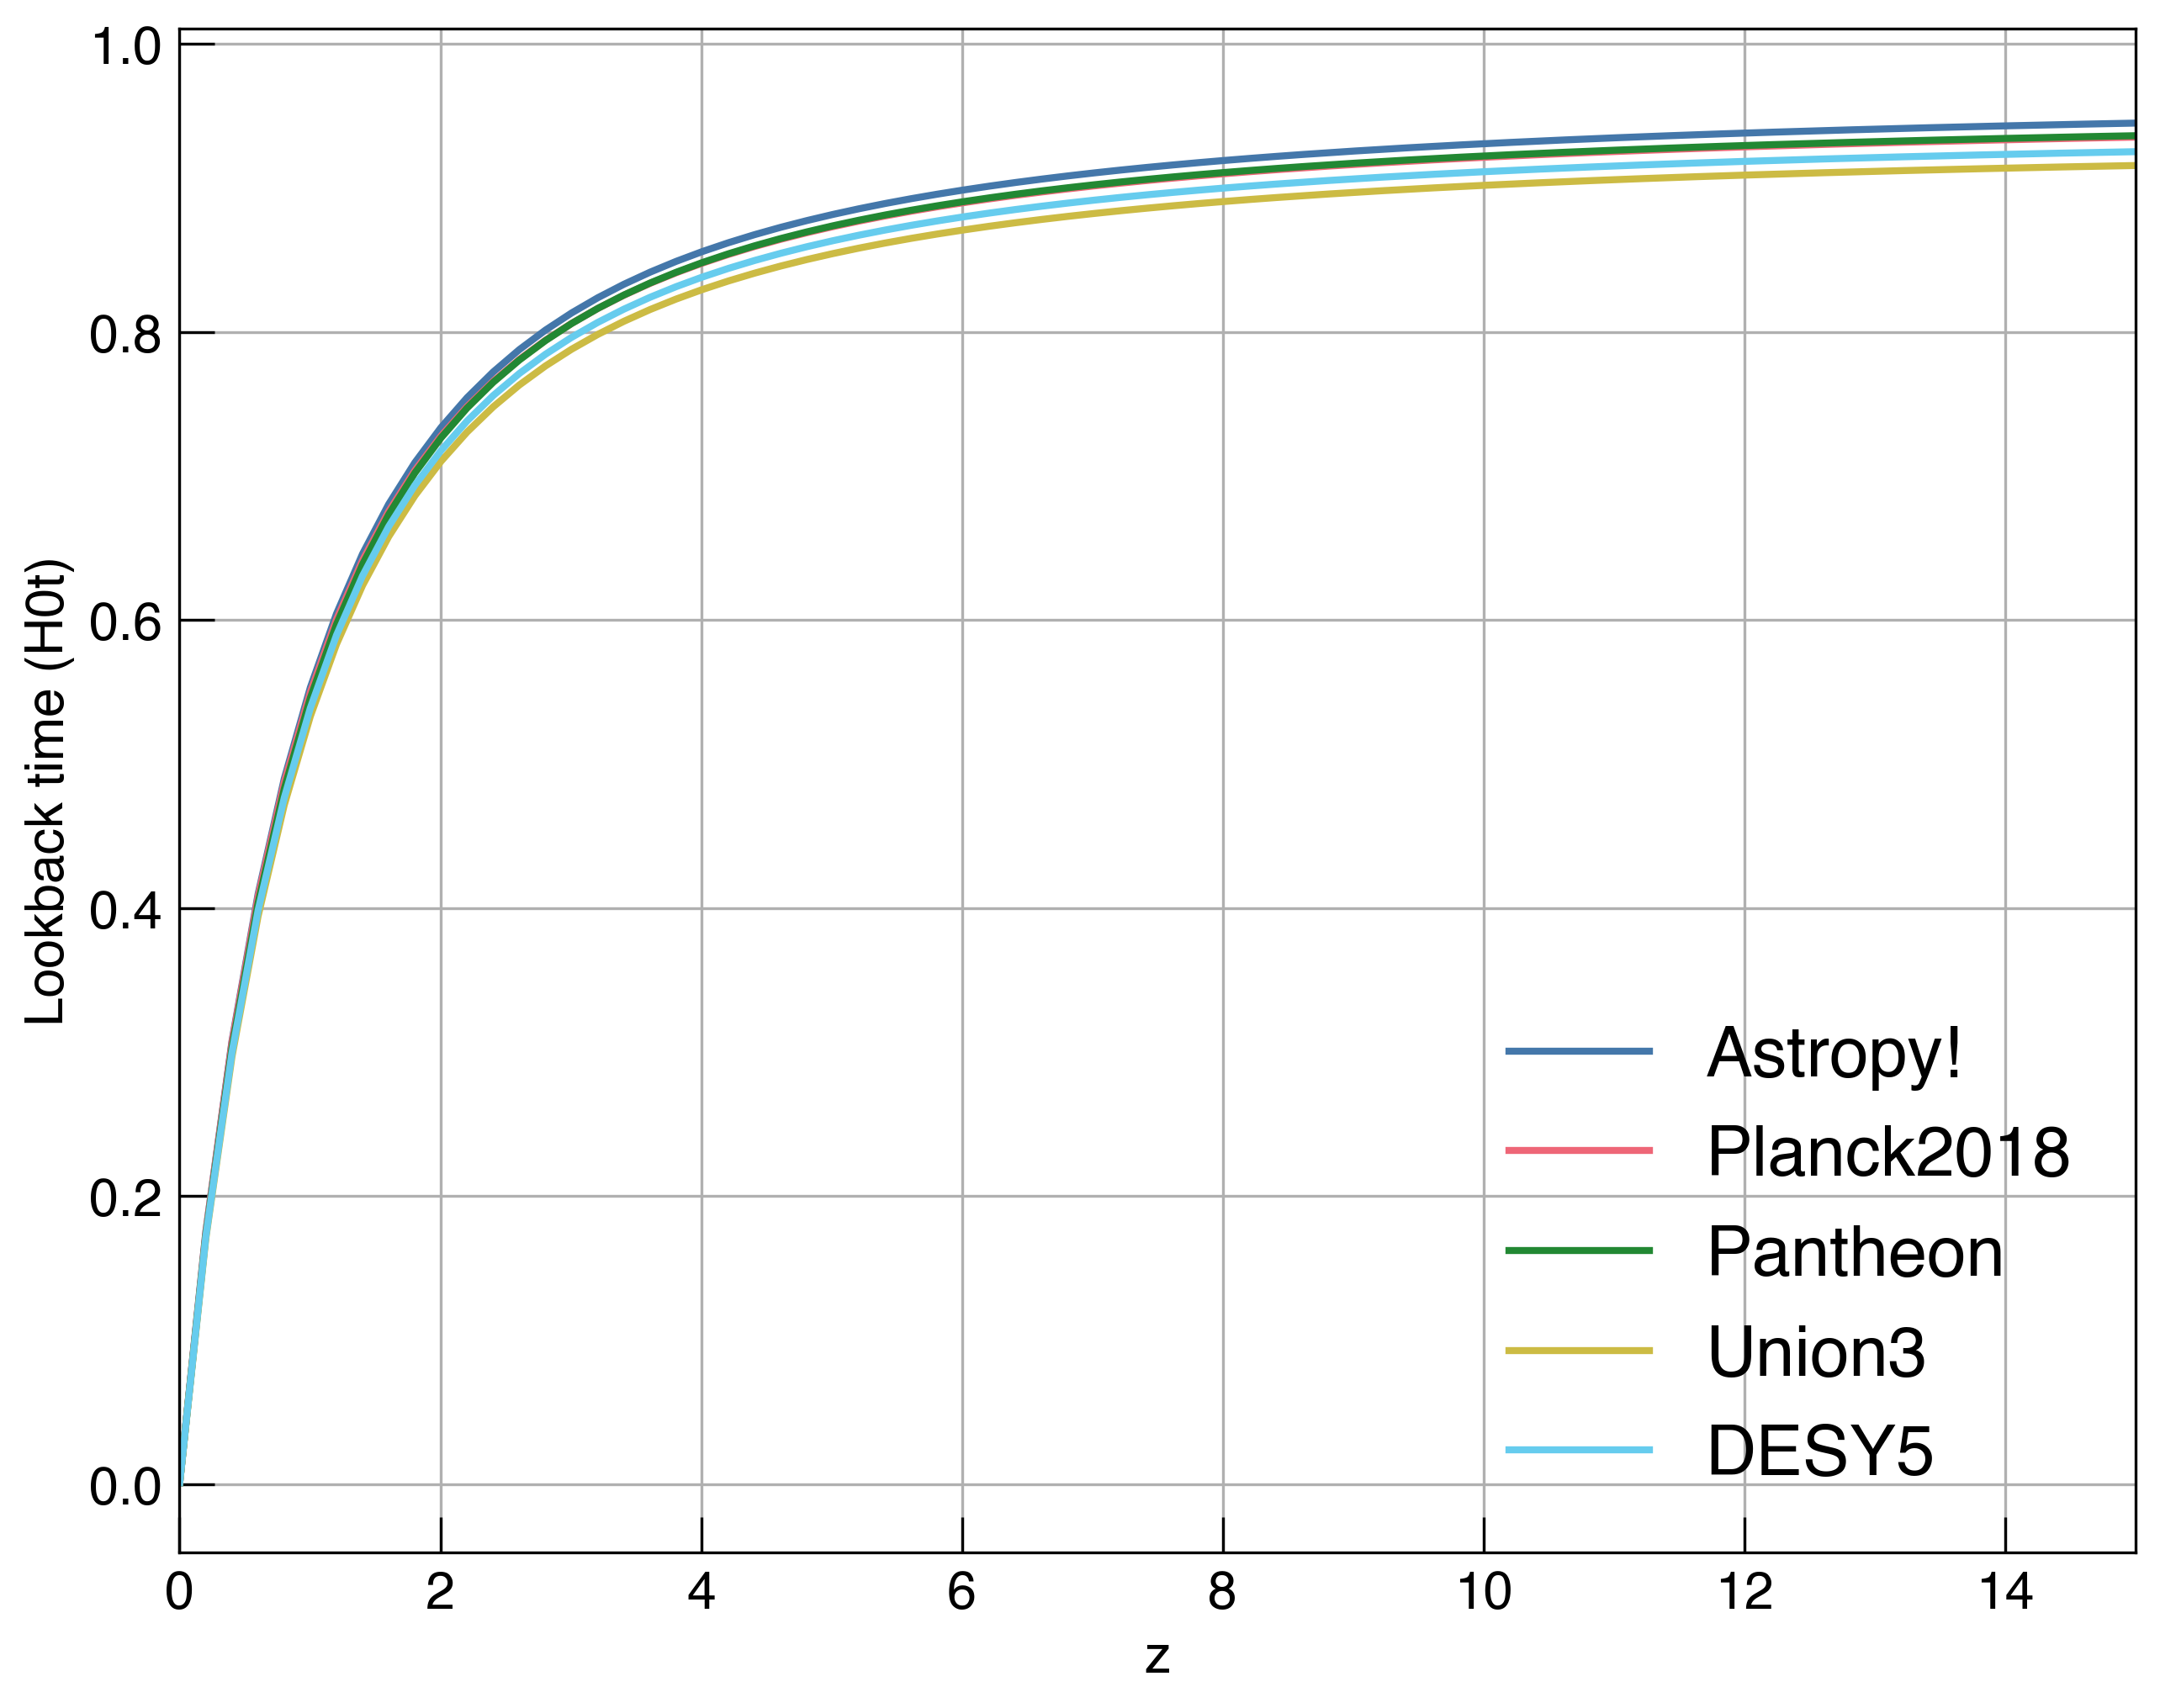

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(z_arr, time_look_astropy, label='Astropy!', lw=2)
ax.plot(z_arr, time_look_Planck2018, label='Planck2018', lw=2)
ax.plot(z_arr, time_look_Pantheon, label='Pantheon', lw=2)
ax.plot(z_arr, time_look_Union3, label='Union3', lw=2)
ax.plot(z_arr, time_look_DESY5, label='DESY5', lw=2)

ax.set_xlabel("z")
ax.set_ylabel("Lookback time (H0t)")

ax.grid()

ax.set_xlim(0,15)

plt.legend()

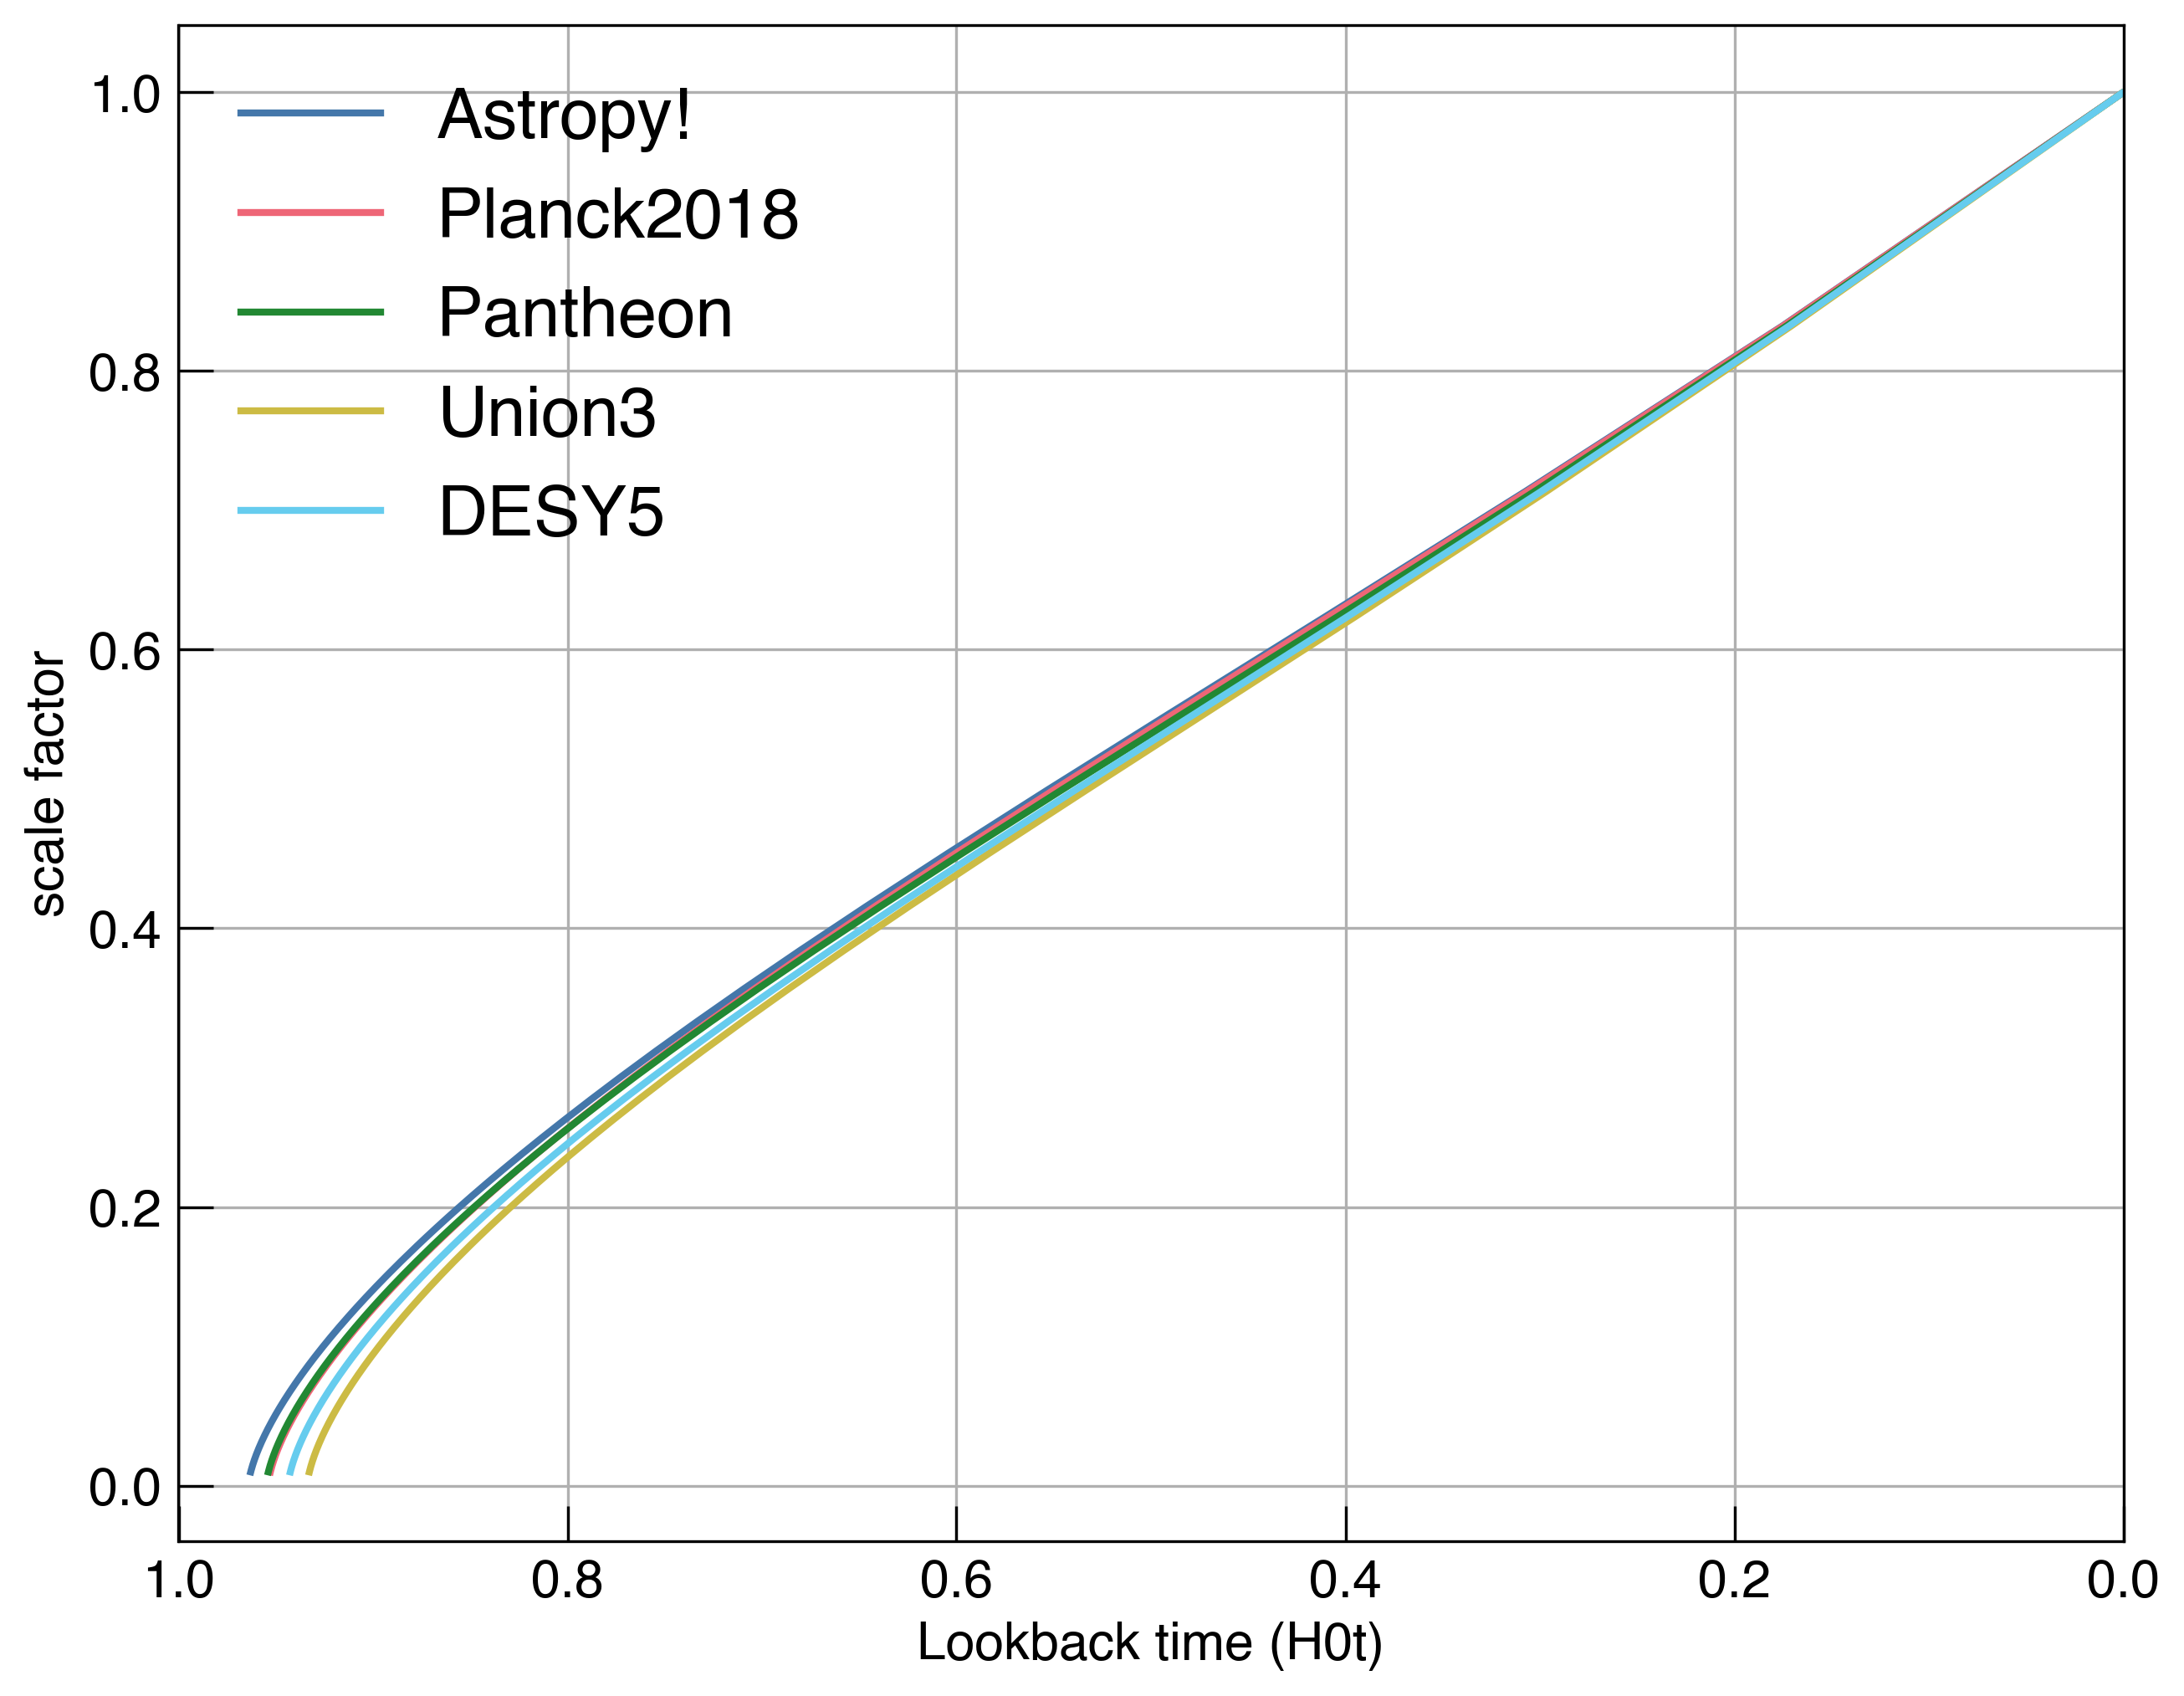

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(time_look_astropy, a_arr, label='Astropy!', lw=2)
ax.plot(time_look_Planck2018, a_arr, label='Planck2018', lw=2)
ax.plot(time_look_Pantheon, a_arr, label='Pantheon', lw=2)
ax.plot(time_look_Union3, a_arr, label='Union3', lw=2)
ax.plot(time_look_DESY5, a_arr, label='DESY5', lw=2)


ax.set_xlabel("Lookback time (H0t)")
ax.set_ylabel("scale factor")

ax.set_xlim(1.0,0.)

ax.grid()

plt.legend()

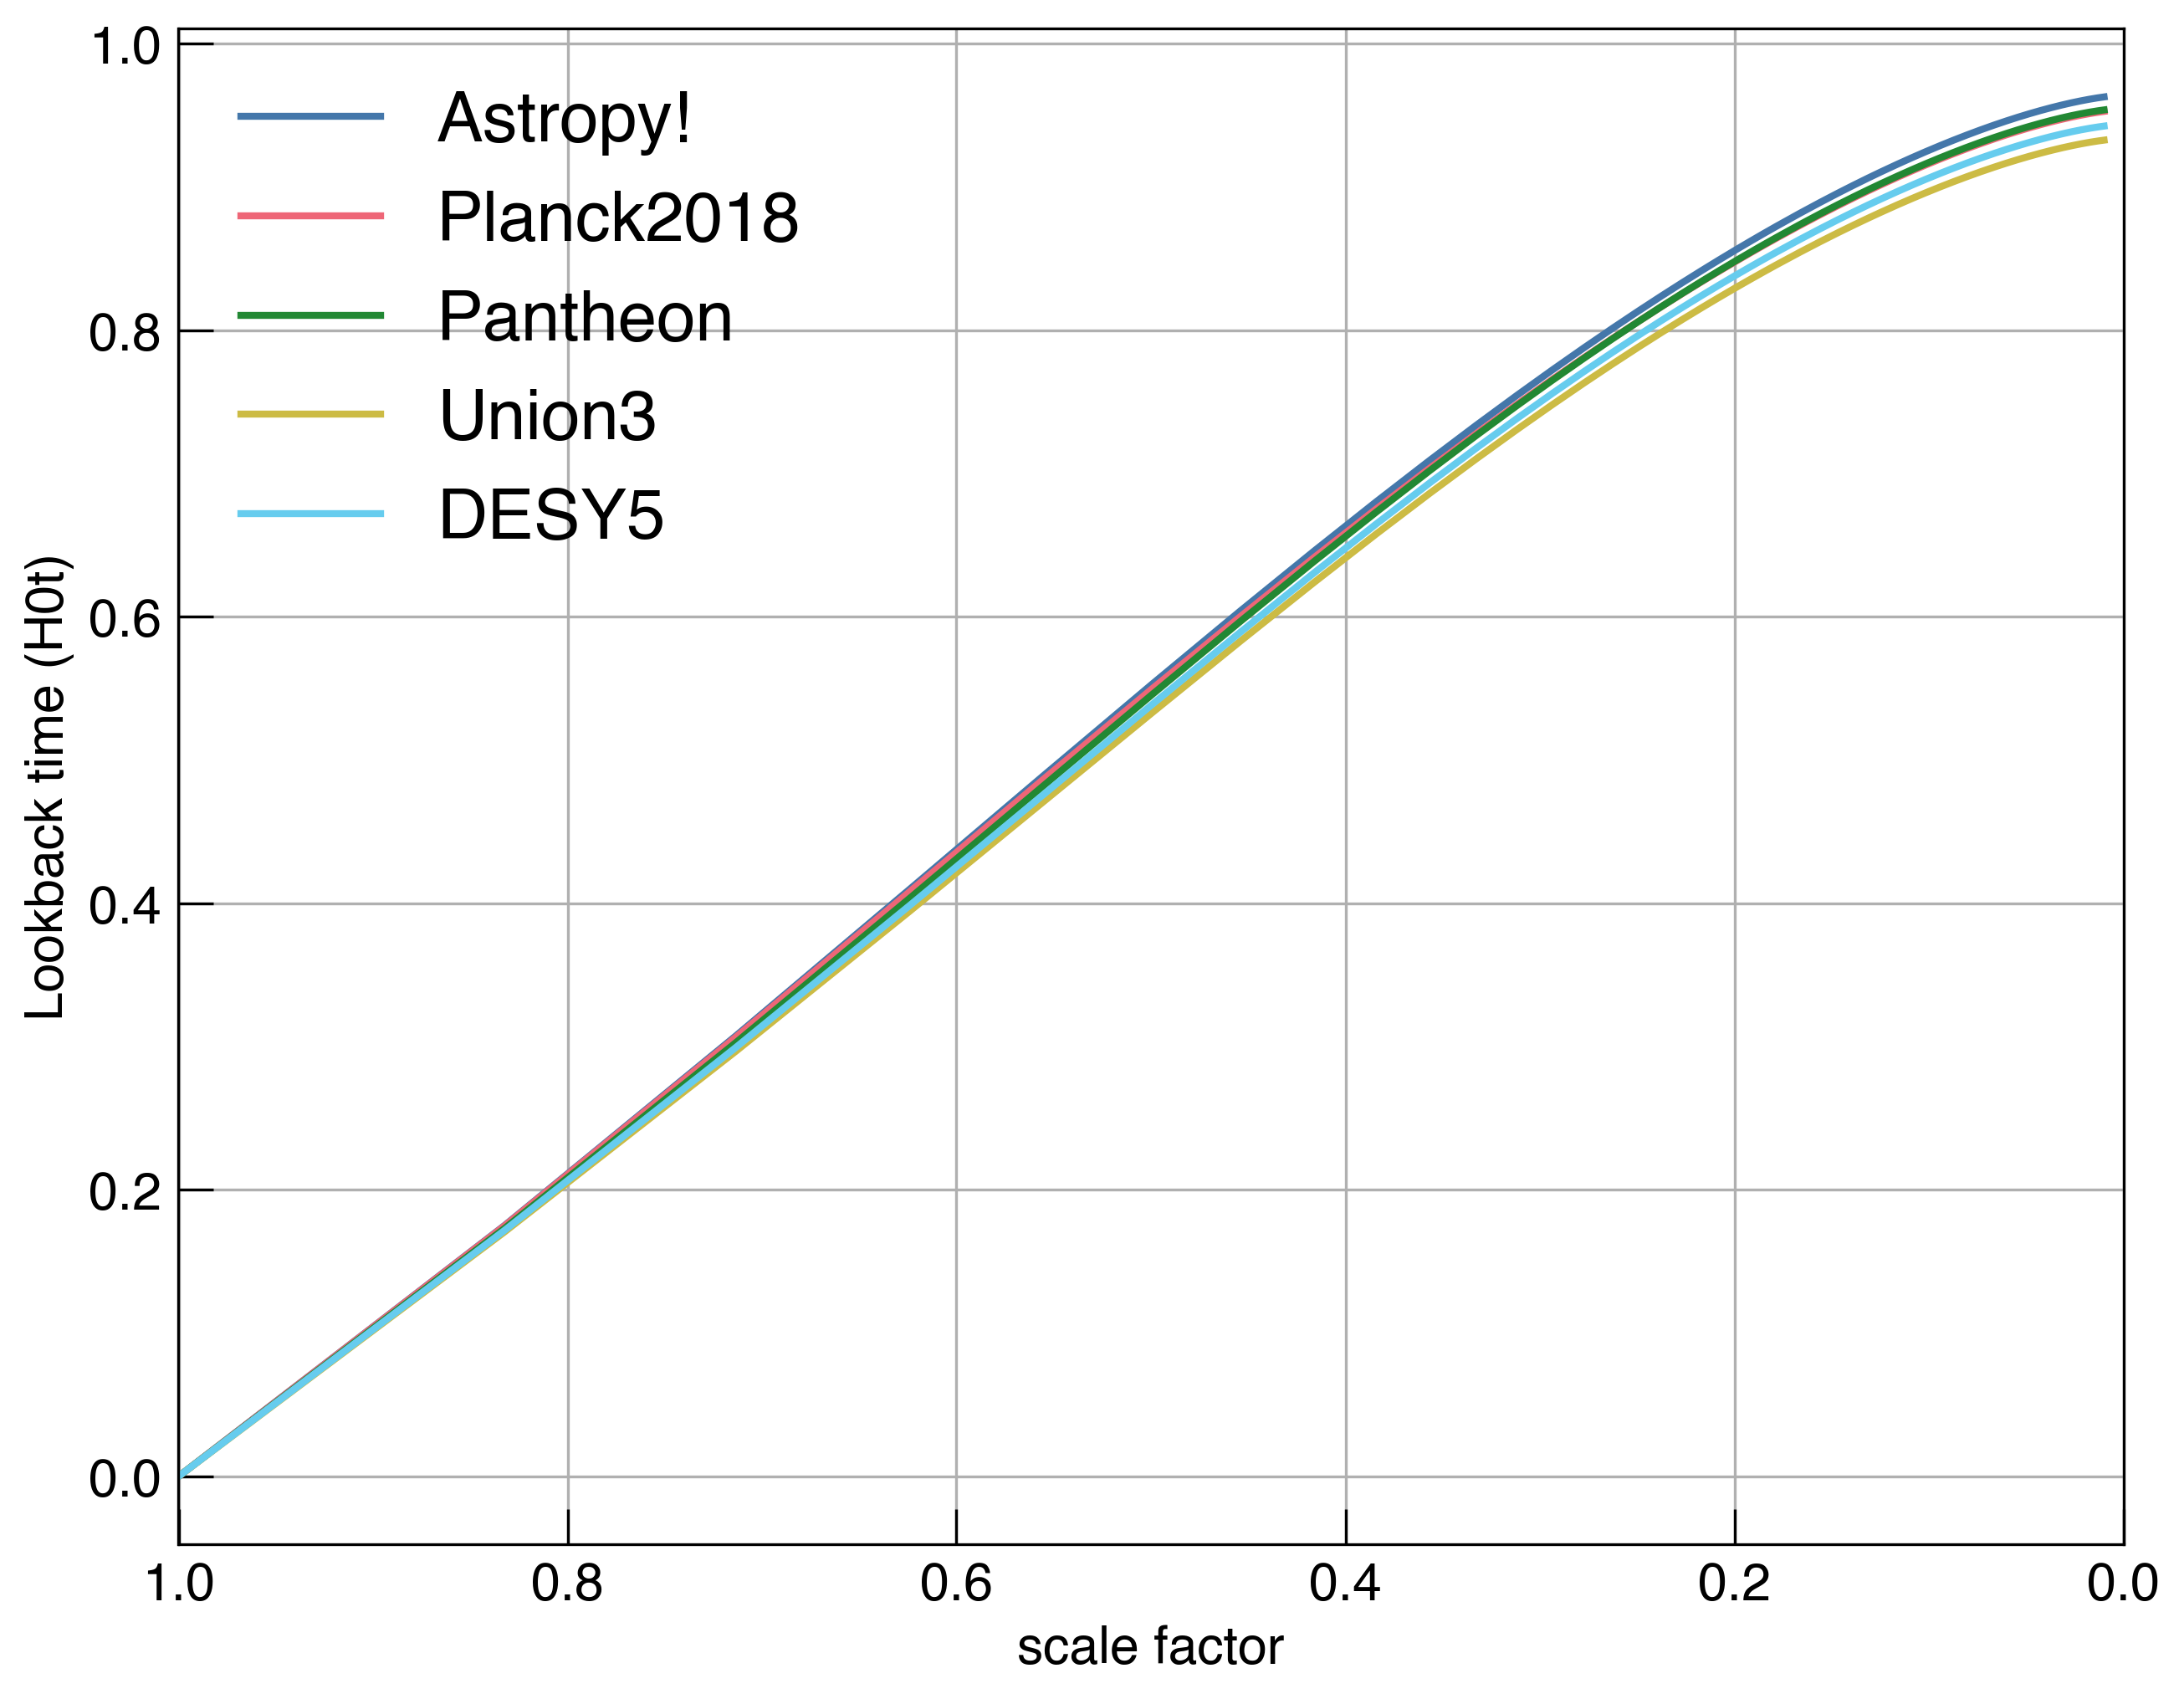

In [12]:
fig, ax = plt.subplots(nrows=1, ncols=1)

ax.plot(a_arr, time_look_astropy, label='Astropy!', lw=2)
ax.plot(a_arr, time_look_Planck2018, label='Planck2018', lw=2)
ax.plot(a_arr, time_look_Pantheon, label='Pantheon', lw=2)
ax.plot(a_arr, time_look_Union3, label='Union3', lw=2)
ax.plot(a_arr, time_look_DESY5, label='DESY5', lw=2)


ax.set_ylabel("Lookback time (H0t)")
ax.set_xlabel("scale factor")

ax.set_xlim(1.0,0.)

ax.grid()

plt.legend()